# Internet Network

### Importando dependências

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plot

### Importando a base

In [4]:
# Importando o arquivo de arestas para o grafo não-direcionado
edgelist_path = "./networks-barabasi/internet.edgelist.txt"

# Usando pandas para ler o arquivo
df_edges = pd.read_csv(edgelist_path, sep='\t', header=None, names=['source', 'target'])

# Instanciando grafo (não-direcionado)
grafo = nx.Graph()

# Adicionando as arestas ao grafo
grafo.add_edges_from(df_edges.values)

### Obtendo métricas da rede

In [9]:
num_nos = grafo.number_of_nodes()
num_arestas = grafo.number_of_edges()
print(f"Número de nós: {num_nos}")
print(f"Número de arestas: {num_arestas}")
print(f"Densidade: {nx.density(grafo):.4f}")

Número de nós: 192244
Número de arestas: 609066
Densidade: 0.0000


In [12]:
# . Obtendo grau médio do grafo
graus = dict(
    nx.degree(grafo)
)  # . Como o degree retorna array de tuplas (nó, grau), converto-os para dicionários key-value no formato nó: grau

graus = list(
    graus.values()
)  # . Convertendo o dicionario para um array só com os graus dos nós

grau_medio = 2 * num_arestas / num_nos
print(f"Grau médio: {grau_medio:.4f}")


Grau médio: 6.3364


In [19]:
print(f"Quantidade de componentes conexas: {nx.number_connected_components(grafo)}")

componentes_conexas = nx.connected_components(grafo)
maior_componente_conexa = max(componentes_conexas, key=len)
qtd_nos_maior_componente_conexa = len(maior_componente_conexa)
print(
    f"Quantidade de nós na maior componente conexa: {qtd_nos_maior_componente_conexa}"
)

# . Diametro
if nx.is_connected(grafo):
    diametro = nx.diameter(grafo)
else:
    gcc_nos = max(nx.connected_components(grafo), key=len)
    diametro = nx.diameter(grafo.subgraph(gcc_nos))
    
print(f"Diâmetro: {diametro:.4f}")

Quantidade de componentes conexas: 308
Quantidade de nós na maior componente conexa: 190914


KeyboardInterrupt: 

In [15]:
tamanhos_componentes_isoladas = [
    len(componente) for componente in list(nx.isolates(grafo))
]

# . Obtendo o tamanho médio das componentes isoladas
tamanho_medio_componentes_isoladas = 0

if len(tamanhos_componentes_isoladas) > 0:
    tamanho_medio_componentes_isoladas = sum(tamanhos_componentes_isoladas) / len(
        tamanhos_componentes_isoladas
    )
else:
    tamanho_medio_componentes_isoladas = "não possui componente isolada!"
    
print(f"Tamanho médio de componentes isoladas: {tamanho_medio_componentes_isoladas}")


Tamanho médio de componentes isoladas: não possui componente isolada!


Coeficiente de clusterização do Grafo: 0.1574


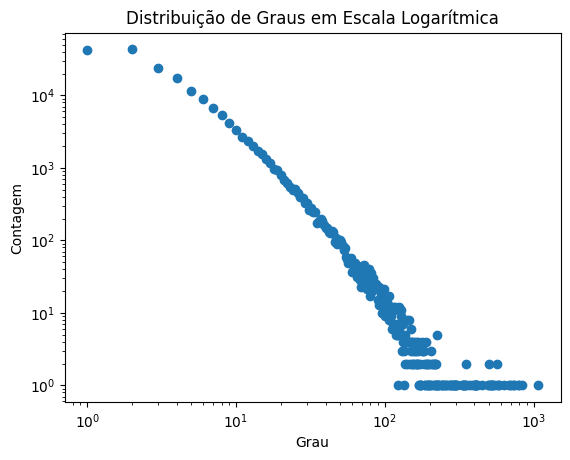

In [16]:

# . Coeficiente de clusterização
print(f"Coeficiente de clusterização do Grafo: {nx.average_clustering(grafo):.4f}")

# . Plotando distribuição de graus
distribuicao_graus = nx.degree_histogram(grafo)

# . Criando lista de graus correspondentes aos índices na distribuição
graus = list(range(len(distribuicao_graus)))

# . Plotando a distribuição de graus em um gráfico de pontos
plot.scatter(graus, distribuicao_graus, marker="o")
plot.xscale(
    "log"
)  # . Definindo que o grafico seja plotado em escala logarítmica no eixo x
plot.yscale(
    "log"
)  # . Definindo que o grafico seja plotado em escala logarítmica no eixo y
plot.xlabel("Grau")
plot.ylabel("Contagem")
plot.title("Distribuição de Graus em Escala Logarítmica")
plot.show()